In [10]:
import fooof
import xarray as xr
import pandas as pd

import seaborn as sb
import seaborn.objects as so
import matplotlib.pyplot as plt

sb.set_style("whitegrid")

OUTPUT_FOLDER = "../data/OUTPUT"

da = xr.load_dataarray(f"{OUTPUT_FOLDER}/LEMON_annotated_power.nc")

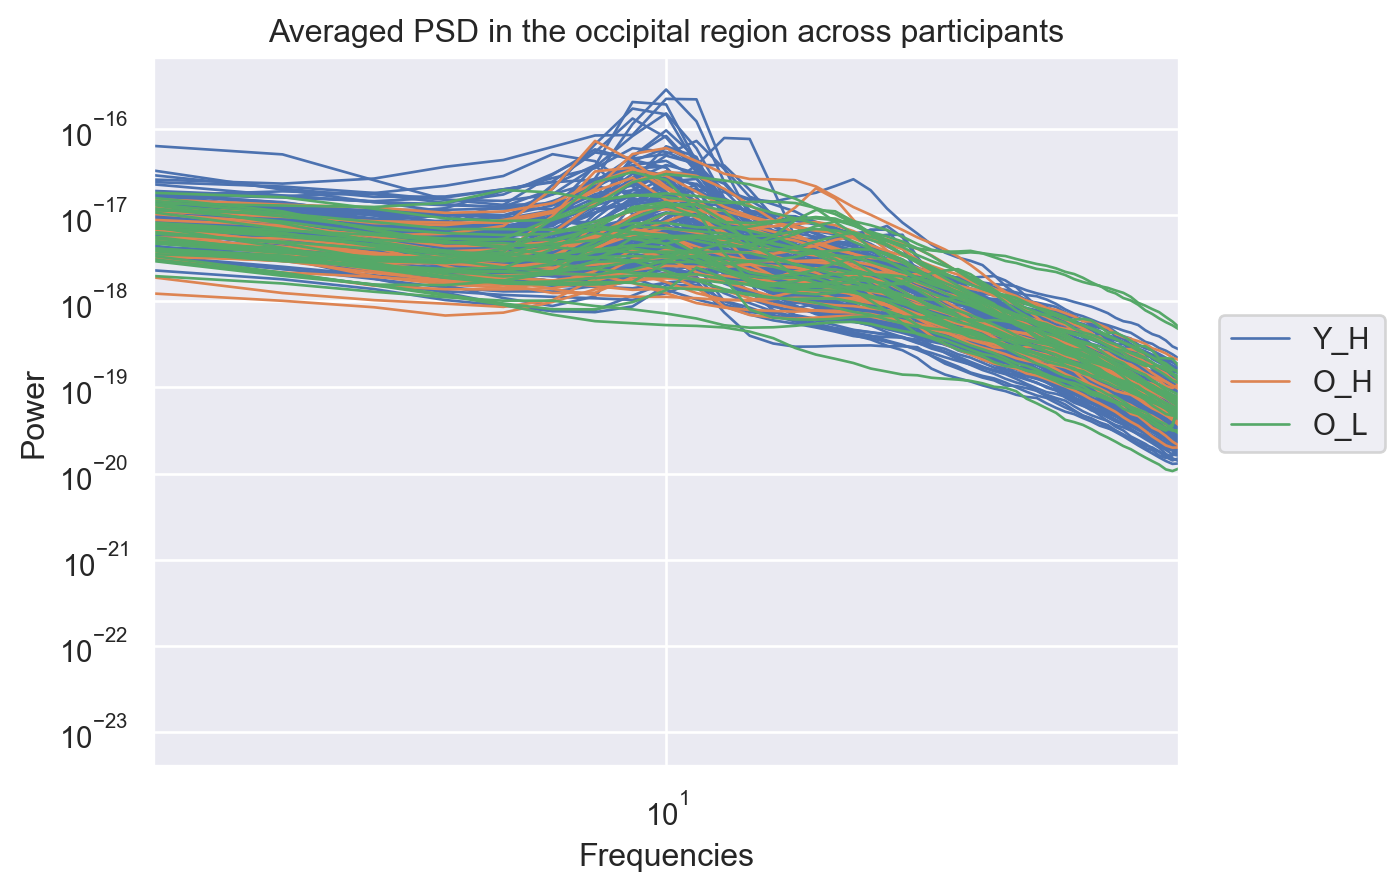

In [50]:
labels = da.roi_names.values
hemispheres = ['L' if label[-1] == 'L' else 'R' if label[-1] == 'R' else 'other' for label in labels]
regions = da.regions.values
hemi_regions = [f"{regio}_{hemi}" for regio, hemi in zip(regions, hemispheres)]


mve_hemi  = (da.assign_coords(hemisphere =('roi_names', hemispheres))
        .assign_coords(hemi_region =('roi_names', hemi_regions)) # the rogions in hemispheres have really similar shape
        .groupby("hemi_region") #there
        .mean(dim="roi_names")

)





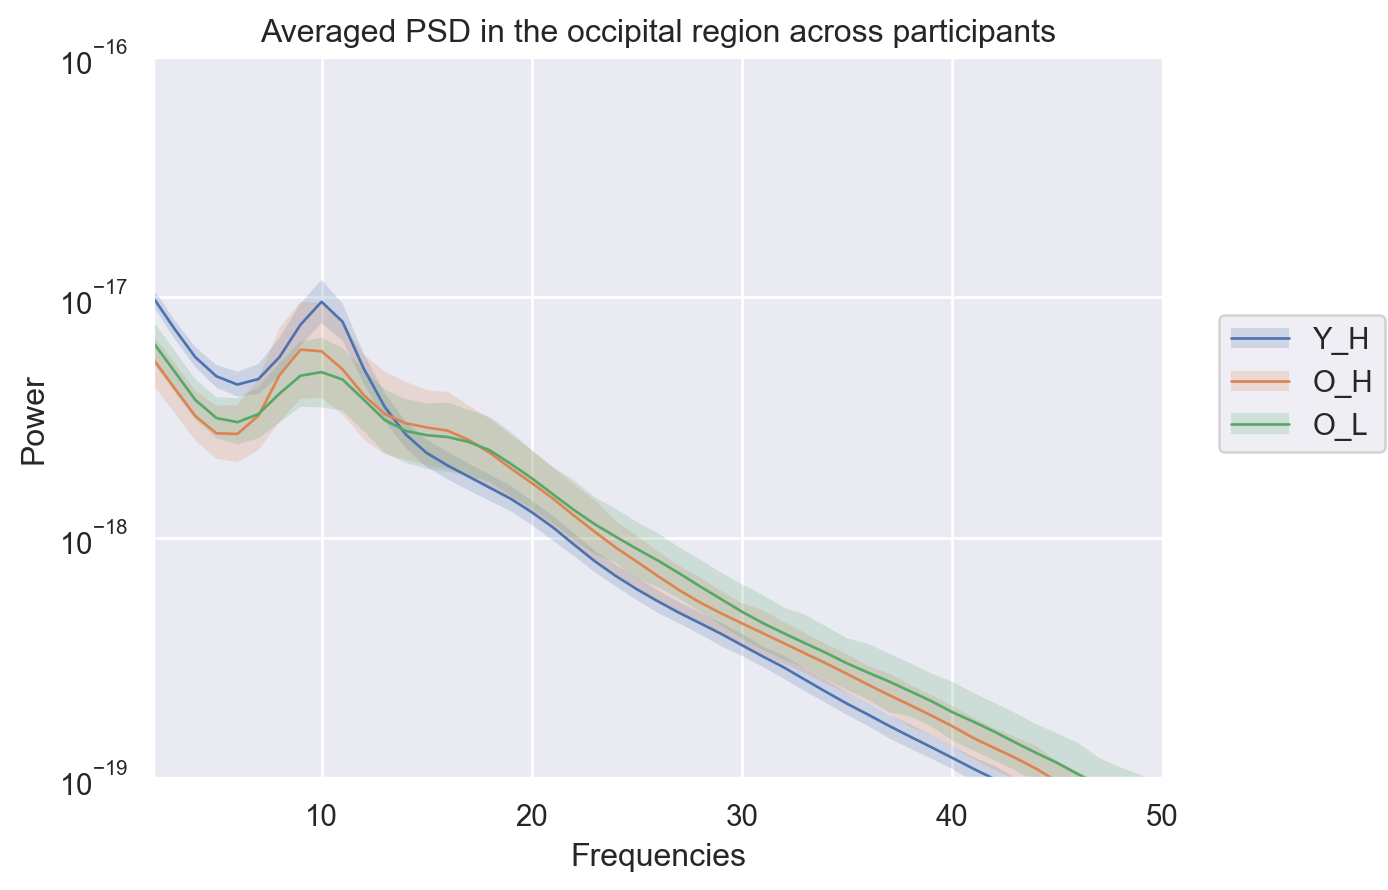

In [54]:


mve_region  = (da.assign_coords(hemisphere =('roi_names', hemispheres))
        .assign_coords(hemi_region =('roi_names', hemi_regions)) # the rogions in hemispheres have really similar shape
        .groupby("regions") #there
        .mean(dim="roi_names")
        .sel(regions = 'occipital')
        .to_dataframe("power")
        .pipe(so.Plot, x="freqs", y="power", color="Y_OH_OL")
        .add(so.Line( linewidth=1), so.Agg())
        .add(so.Band(), so.Est(), group="Y_OH_OL")
        .limit(x=(2, 50), y=(10e-20, 10e-17))
        .scale(y="log")
        .label(
                x="Frequencies",
                y="Power",
                title="Averaged PSD in the occipital region across participants",
                color="",
    )


)
mve_region

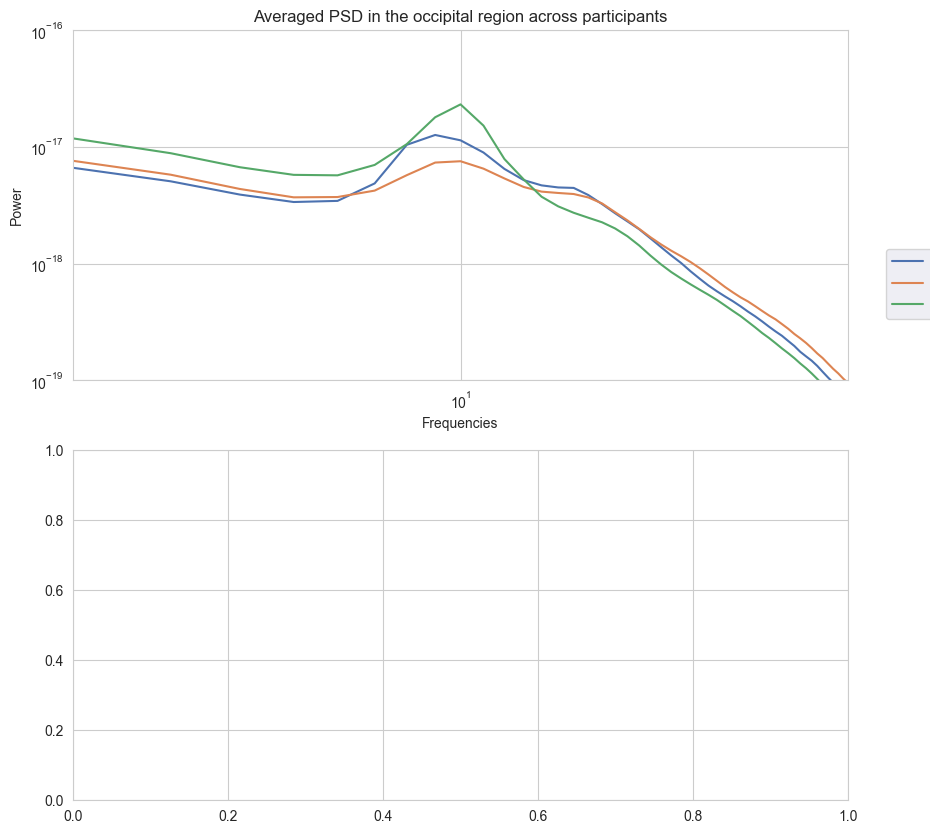

In [27]:
f, axs = plt.subplots(2, 1, figsize=(10, 10))

p = (
    mve.loc[dict(hemi_region="occipital_R")]
        .groupby("Y_OH_OL")
        .mean(dim="sub")
        .to_dataframe("power")
        .pipe(so.Plot, x="freqs", y="power", color="Y_OH_OL")
        .add(so.Line())
        .scale(y="log")
        .scale(x="log")
        .limit(x=(2, 50), y=(10e-20, 10e-17))
        .label(
            x="Frequencies",
            y="Power",
            title="Averaged PSD in the occipital region across participants",
            color="",
        )
)
# Draw the plot on the first axes
p.on(axs[0]).show()

# Draw the same plot on the second axes
p.on(axs[1]).show()

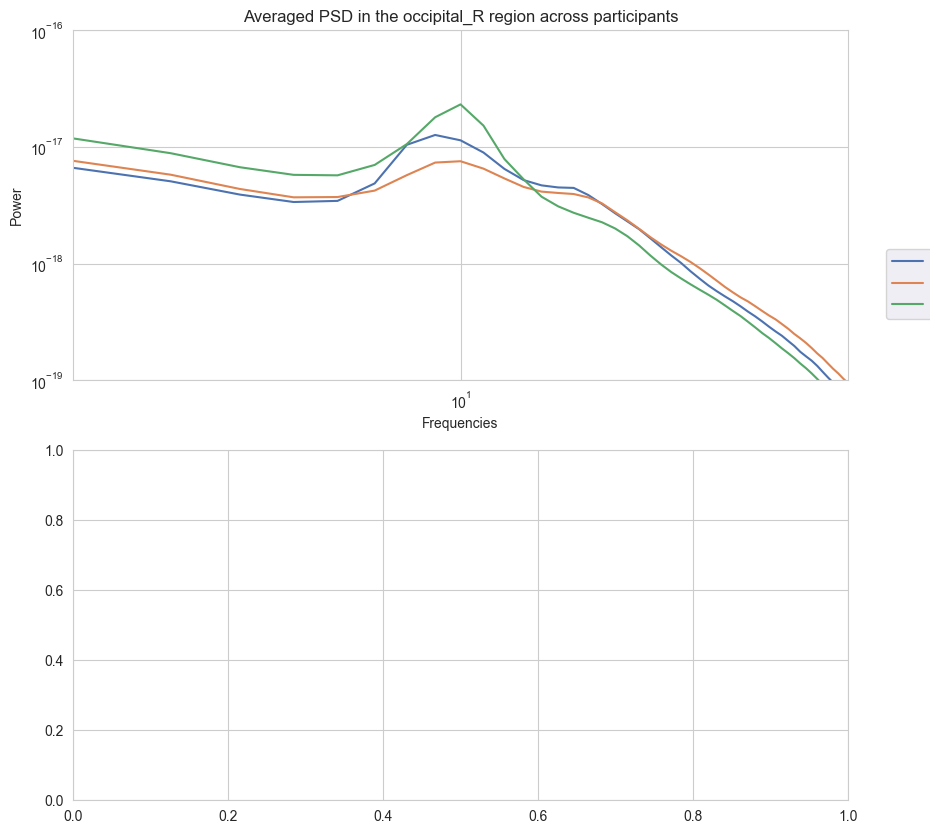

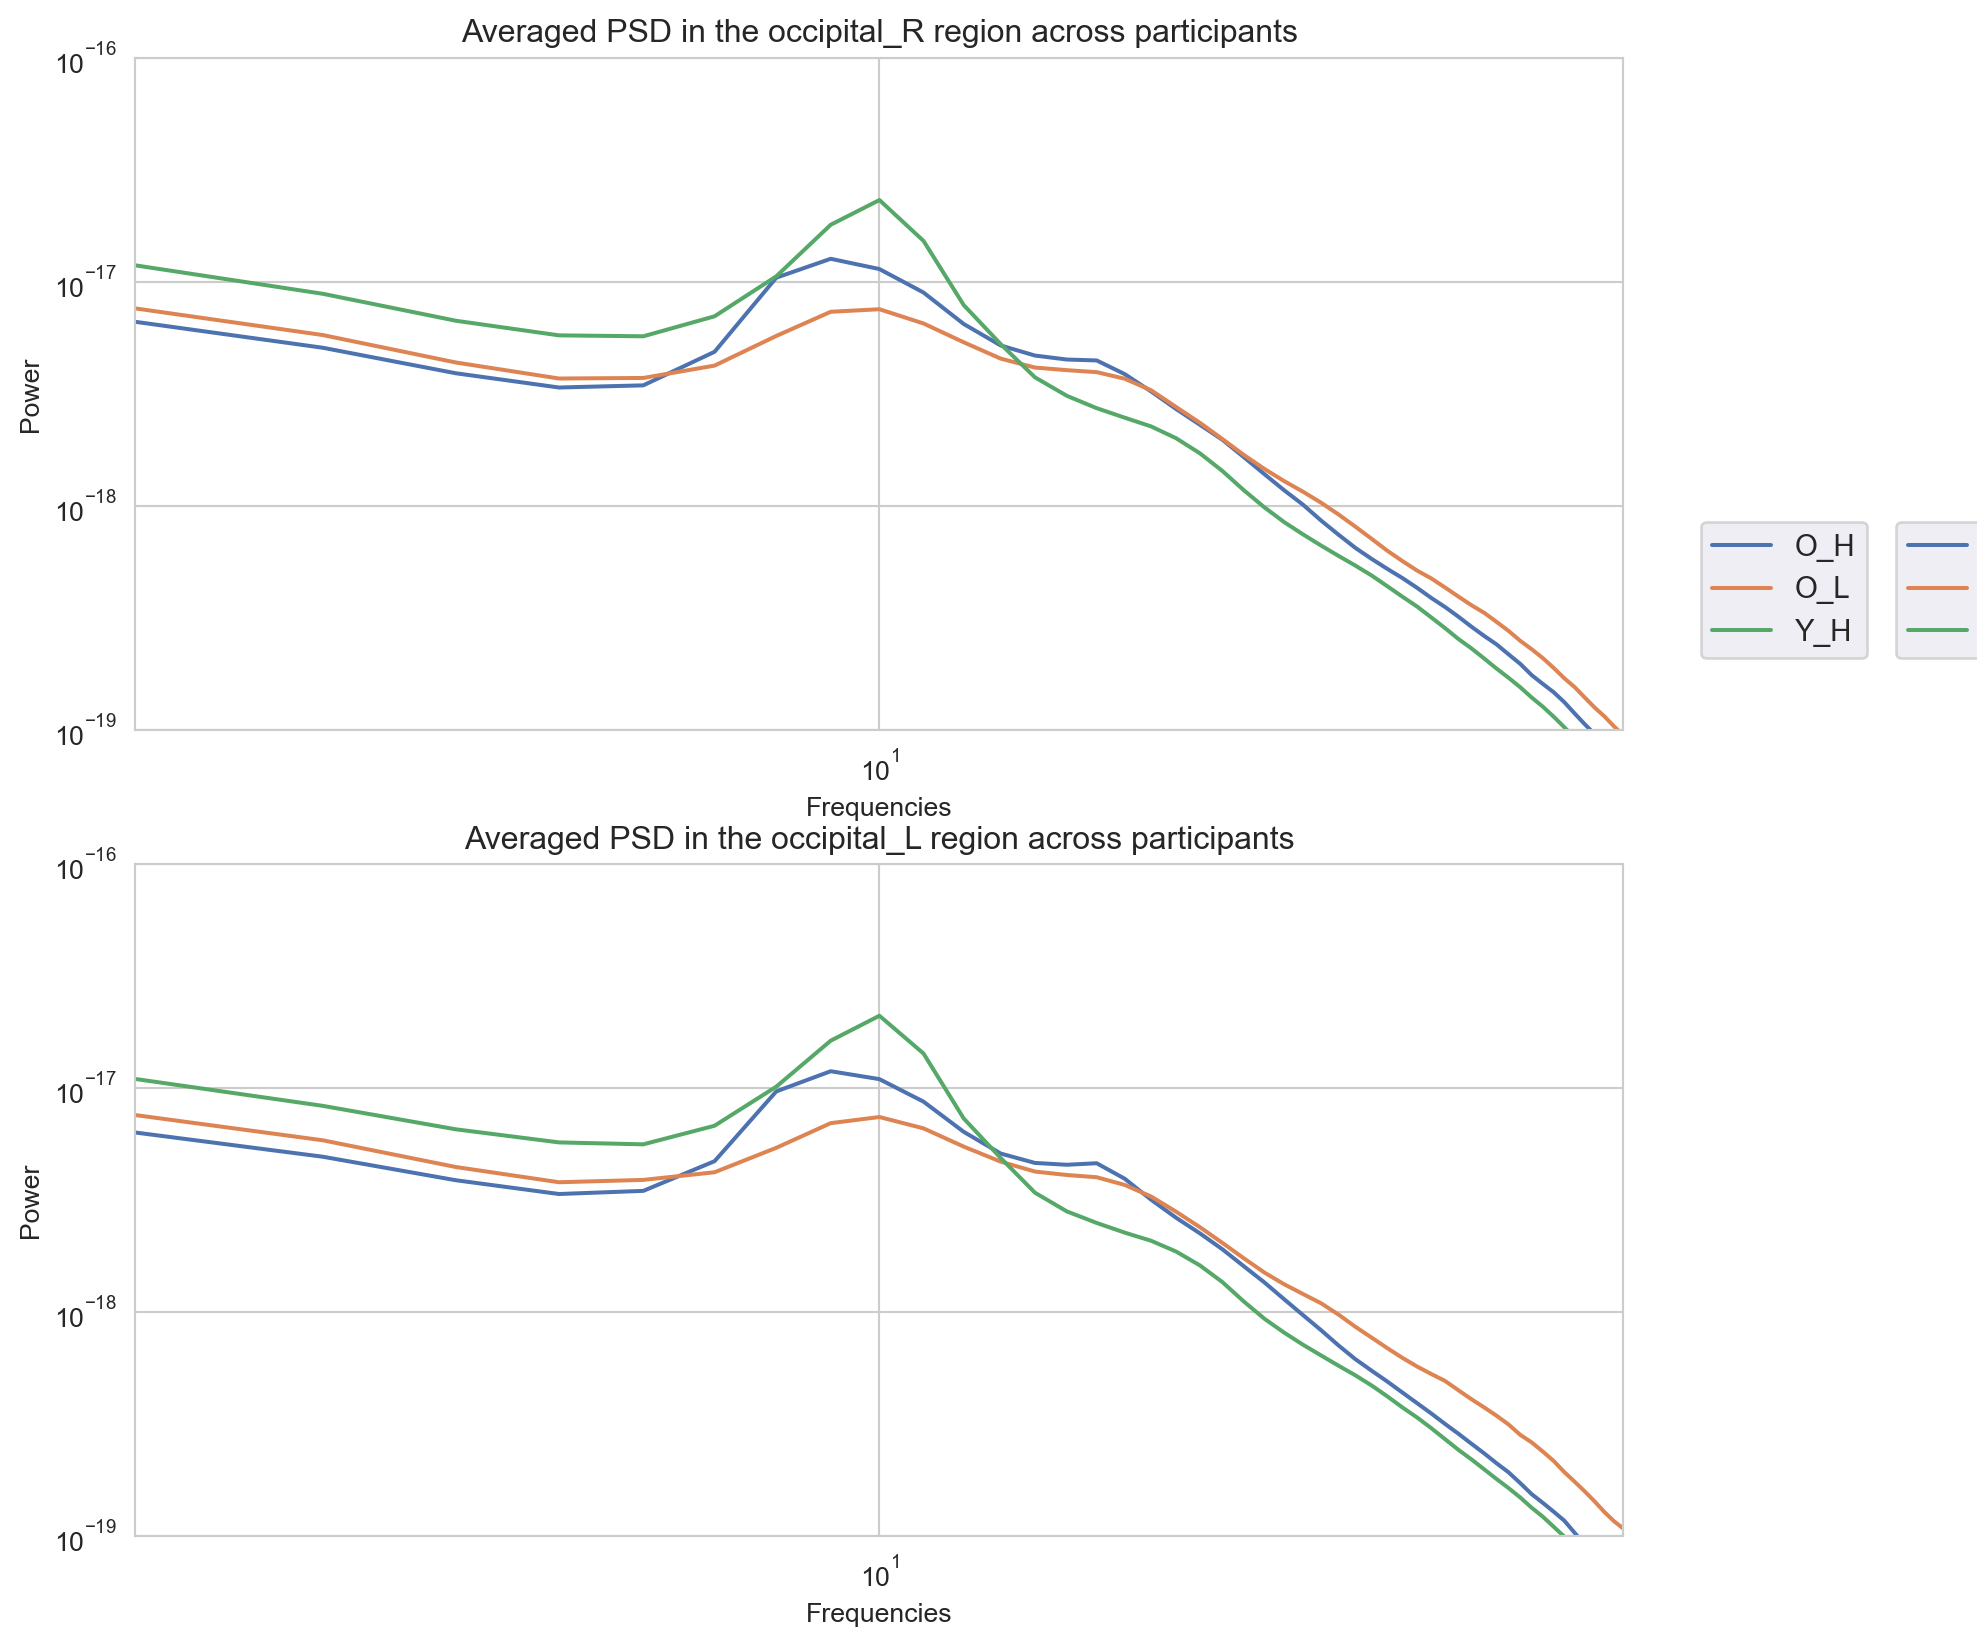

In [32]:
def create_plot(data, region, x="freqs", y="power", color="Y_OH_OL"):
    """Create a plot from the given data, using the specified region, x, y, and color."""
    return (
        data.loc[dict(hemi_region=region)]
        .groupby(color)
        .mean(dim="sub")
        .to_dataframe(y)
        .pipe(so.Plot, x=x, y=y, color=color)
        .add(so.Line())
        .scale(y="log")
        .scale(x="log")
        .limit(x=(2, 50), y=(10e-20, 10e-17))
        .label(
            x="Frequencies",
            y="Power",
            title=f"Averaged PSD in the {region} region across participants",
            color="",
        )
    )

# Create a 2x1 subplot with a specific figure size
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Create the plot for the specified region
occipital_R = create_plot(mve, "occipital_R")
occipital_L = create_plot(mve, "occipital_L")


# Draw the plot on the first axes
occipital_R.on(axs[0]).show(block=False)

# Draw the same plot on the second axes
occipital_L.on(axs[1])




In [ ]:
(xr.load_dataarray(f"{OUTPUT_FOLDER}/LEMON_annotated_power.nc")
.
)

p = (  # just pass time series without averaging
    compute_specparam_parameters(dap, fg, freq_range, dim_second="roi_names")
    .merge(map_subjects, on="subject", how="left")
    .merge(map_regions(), on="roi_names", how="left")
    .pipe(so.Plot, x="exponent", y="offset", color="regions")
    .add(so.Dot(pointsize=2))
)